<a href="https://colab.research.google.com/github/12345997/core-week-4-IP/blob/main/week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUTOLIB DATASET
This is a dataset from an electric car sharing company showing the picking and returning of different cars within different stations. These stations are represented by postal codes and picking day types classified to either weekend or weekday.


#loading the libraries we are going to use 

In [162]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
#loading the our dataset in our environment
Autolib_dataset=pd.read_csv("/content/autolib_daily_events_postal_code.csv")
Autolib_dataset.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#Data cleaning

In [164]:
#checking and handling anomalies
Autolib_dataset.columns = Autolib_dataset.columns.str.replace(' ', '_')

In [165]:
#checking for any null values in our columns
Autolib_dataset.isnull().sum()

Postal_code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [166]:
## looking for dublicates
Autolib_dataset.duplicated().any()

False

#checking and removing of outliers from the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


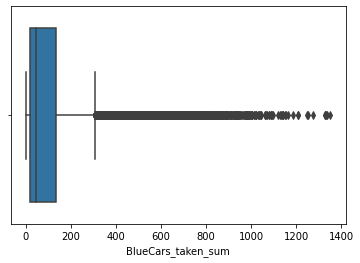

In [167]:
#using seaborn to check for outlies
sns.boxplot(Autolib_dataset["BlueCars_taken_sum"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


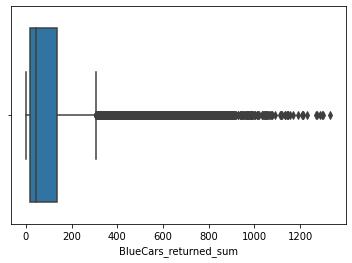

In [168]:

sns.boxplot(Autolib_dataset["BlueCars_returned_sum"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


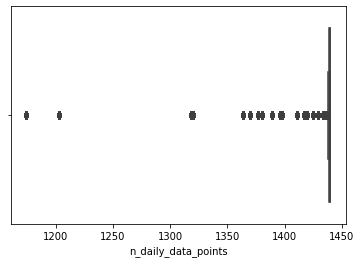

In [169]:
sns.boxplot(Autolib_dataset["n_daily_data_points"])

In [170]:
### dealing with the outliers
q1=Autolib_dataset.quantile(0.25)
q3=Autolib_dataset.quantile(0.75)
IQR =q3-q1
data = Autolib_dataset[~((Autolib_dataset < (q1 - 1.5 * IQR)) |(Autolib_dataset > (q3 + 1.5 * IQR))).any(axis=1)]
data.shape
data.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [171]:
#checking our dataset info
Autolib_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [172]:
#dropping unnesesary columns
Autolib_dataset.drop(["Utilib_taken_sum","Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum","Slots_freed_sum","Slots_taken_sum"],axis=1,inplace=True)

In [173]:
#checking for correlation among different columns 
Autolib_dataset.corr()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
Postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000


In [174]:
#describing our dataset
Autolib_dataset.describe()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714
std,7647.342000,33.212050,2.008378,185.426579,185.501535
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000


#univariate analysis

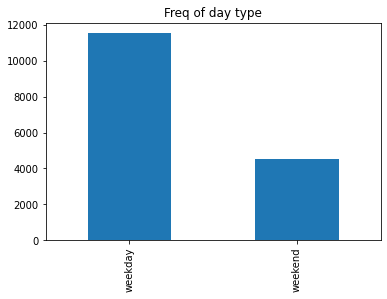

In [175]:
#frequency of day type plot
Autolib_dataset['day_type'].value_counts().plot.bar(title='Freq of day type')

from the bar plot above it was observed that cars were commonly taken and returned during the weekdays than during the weekend

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


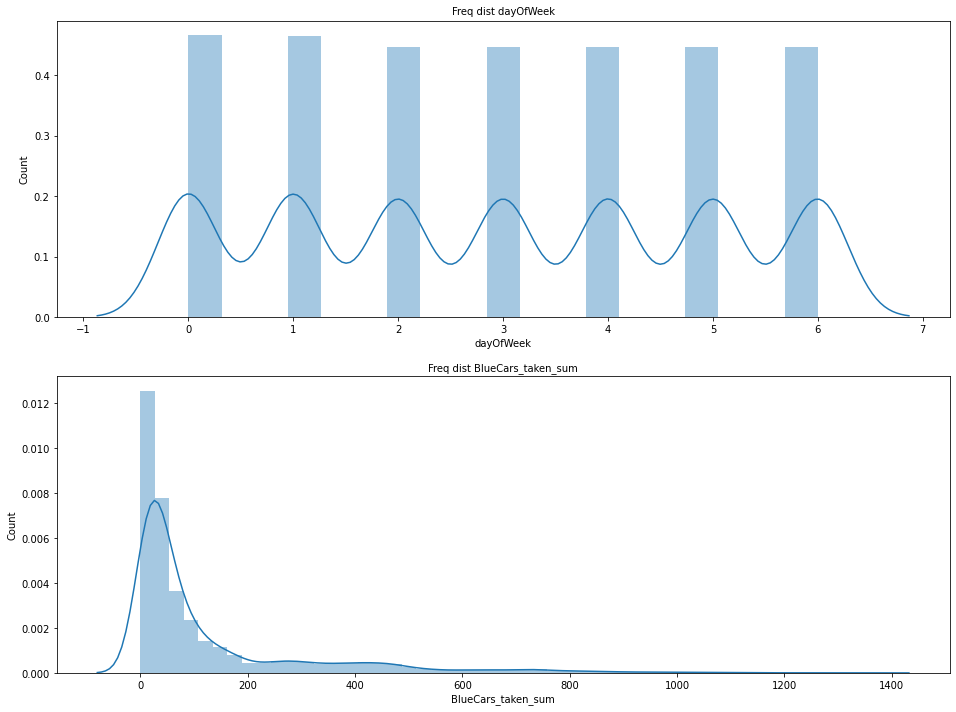

In [176]:
col_names=["dayOfWeek","BlueCars_taken_sum",]
fig, ax =plt.subplots(len(col_names),figsize=(16,12))
for  i, col_val in enumerate(col_names):
   sns.distplot(Autolib_dataset[col_val], hist=True, ax=ax[i])

   ax[i].set_title('Freq dist '+col_val, fontsize=10)
   ax[i].set_xlabel(col_val, fontsize=10)
   ax[i].set_ylabel('Count', fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

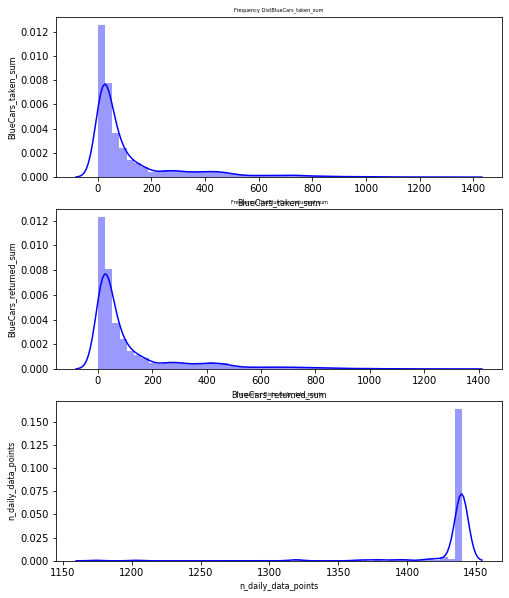

In [178]:
#the frequency distribution
col_names = ['BlueCars_taken_sum', 'BlueCars_returned_sum','n_daily_data_points']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(Autolib_dataset[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_title('Frequency Dist' + col_val, color='black',fontsize=5,)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

From the above graph we can see that the blue car returned and blue cars taken are normally distributed althoughit they are all skewed. on the flip side the n_daily data points is not normally distributed

In [179]:
#The total number of blue cars in each postal code
Postal_code=Autolib_dataset.pivot_table(values=['BlueCars_taken_sum'],index=['Postal_code'],aggfunc='sum').sort_values(by='BlueCars_taken_sum',ascending=0)
Postal_code.head(35)

,BlueCars_taken_sum
Postal_code,
75015,139925
75016,123287
75017,114581
75013,84489
75019,81973
75012,77572
75014,75862
75011,74939
75020,72331


above is a presentation of blue cars taken from different postal codes arranged in ascending order 

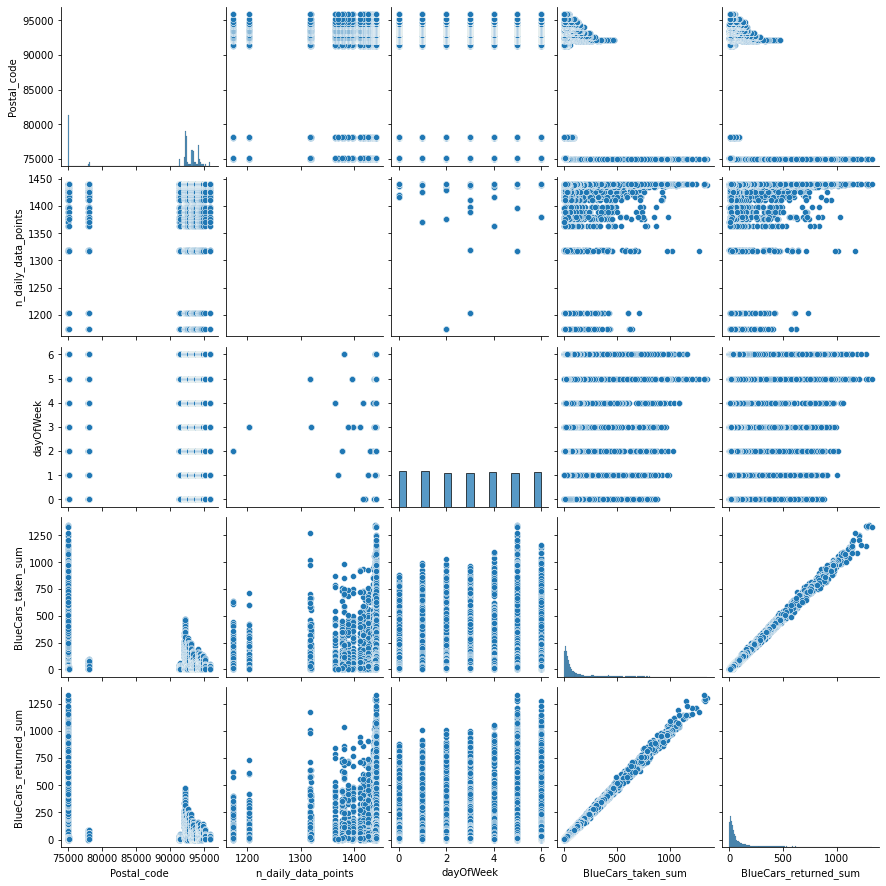

In [180]:
# a pair plot for the dataset
sns.pairplot(Autolib_dataset)

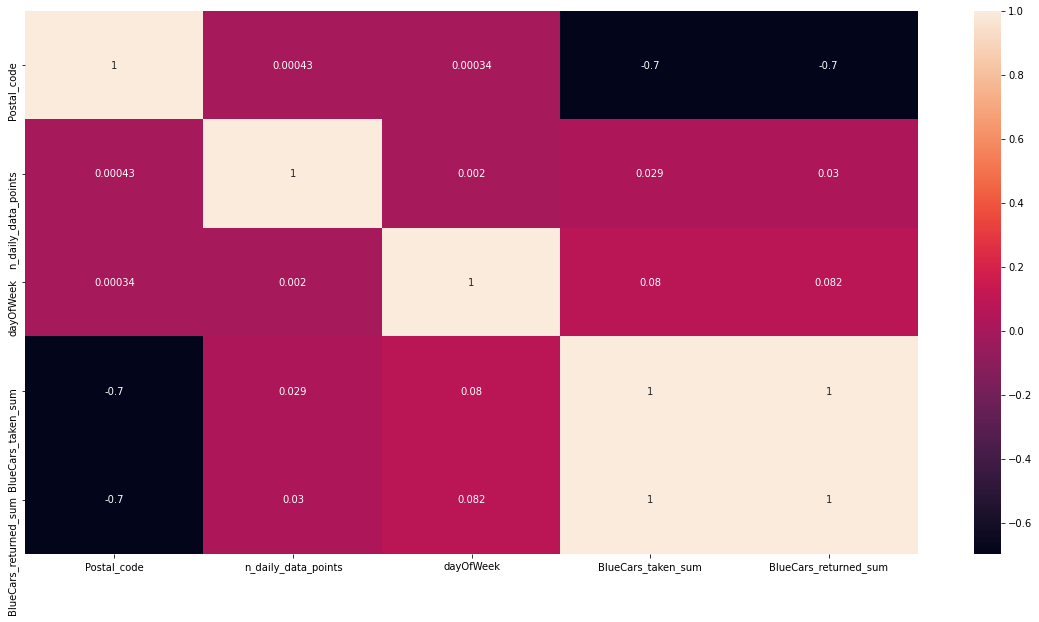

In [181]:
# calculating and visualizing the correlation of the data

fig, ax= plt.subplots(figsize=(20,10))
ax=sns.heatmap(Autolib_dataset.corr(),annot=True)

In [182]:
#checking the description of our dataset
Autolib_dataset.describe(include="all")

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN
top,NaN,5/31/2018,NaN,NaN,weekday,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000


# Exploratory Analysis

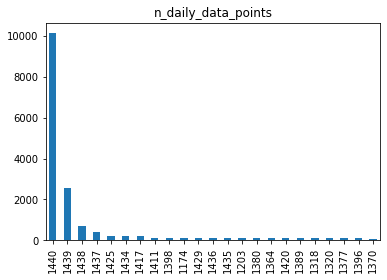

In [240]:
# Ploting the univariate summaries and recording our observations
#
Autolib_dataset["n_daily_data_points"].value_counts().plot.bar(title="n_daily_data_points")

In [185]:
#day of week frequency table
Autolib_dataset["dayOfWeek"].value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayOfWeek, dtype: int64

#Bivariate analysis

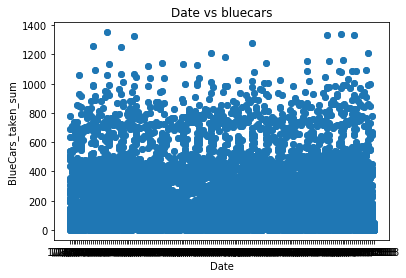

In [239]:
#Plotting our scatterplot to compare the variables
Autolib_dataset.plot(x = 'date', y = 'BlueCars_taken_sum', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(Autolib_dataset["date"] , Autolib_dataset["BlueCars_taken_sum"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = Autolib_dataset["date"], y = Autolib_dataset["BlueCars_taken_sum"], fit_reg=False)

# Giving our scatterplot a title
plt.title("Date vs bluecars")

# Labelling our x axis
plt.xlabel('Date')

# Labelling our y axis
plt.ylabel('BlueCars_taken_sum')

# We then display our scatterplot as shown below
plt.show()

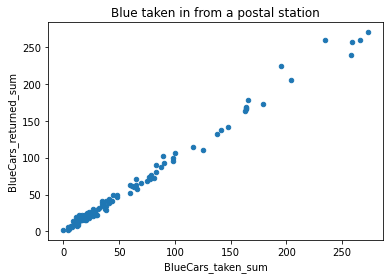

In [209]:
#plotting our scatterplot
Autolib_dataset[Autolib_dataset['BlueCars_taken_sum'] < 300].sample(100).plot.scatter(x='BlueCars_taken_sum', y='BlueCars_returned_sum')

# Giving our scatterplot a title
plt.title('Blue taken in from a postal station')

# Displaying our scatterplot
plt.show()

there is a direct proportionality betweeen cars returned and cars taken as obseverd from the plot

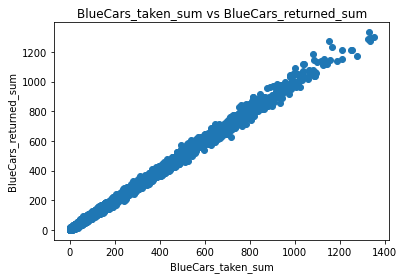

In [210]:
plt.scatter(Autolib_dataset["BlueCars_taken_sum"], Autolib_dataset["BlueCars_returned_sum"])
plt.title("BlueCars_taken_sum vs BlueCars_returned_sum")
plt.xlabel("BlueCars_taken_sum")
plt.ylabel("BlueCars_returned_sum")
plt.show()

the fig above shown that there was a direct correlation between blue_cars returned and blue cars taken

#pearson correlation

In [189]:
# Calculating the pearson coefficient
pearson_coeff = Autolib_dataset["dayOfWeek"].corr(Autolib_dataset["BlueCars_taken_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = Autolib_dataset["dayOfWeek"].corr(Autolib_dataset["BlueCars_taken_sum"]) 
print(coeff)

0.07964926759308416
0.07964926759308416


In [190]:
# Calculating the pearson coefficient
pearson_coeff = Autolib_dataset["BlueCars_returned_sum"].corr(Autolib_dataset["BlueCars_taken_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = Autolib_dataset["BlueCars_returned_sum"].corr(Autolib_dataset["BlueCars_taken_sum"]) 
print(coeff)

0.9986597051672199
0.9986597051672199


the pearson correlation showed a close correlation between blue car returned and blue car taken

In [191]:
sample_data = Autolib_dataset.sample(n=1000, replace='False')

In [192]:
sample_data.head(5)

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
350,75003,2/8/2018,1438,3,weekday,198,199
14488,94230,5/2/2018,1440,2,weekday,40,44
12970,94000,1/4/2018,1320,3,weekday,66,69
5488,92160,2/1/2018,1440,3,weekday,18,16
1097,75008,1/6/2018,1437,5,weekend,442,456


In [225]:
# We will select the blue cars that were taken during the weekdays
Autolib=Autolib_dataset[Autolib_dataset['day_type']=='weekday']
Autolib.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [226]:
Autolib_sample = Autolib.sample(n=1000, replace='False')
Autolib_sample

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
7034,92270,1/18/2018,1439,3,weekday,24,27
11831,93370,1/29/2018,1440,0,weekday,2,0
7921,92330,5/8/2018,1425,1,weekday,44,40
8328,92360,3/19/2018,1440,0,weekday,7,7
14074,94160,1/17/2018,1440,2,weekday,46,54
...,...,...,...,...,...,...,...
8722,92390,1/2/2018,1438,1,weekday,12,12
13449,94120,1/16/2018,1440,1,weekday,31,32
10656,93170,3/15/2018,1440,3,weekday,41,36
11335,93310,1/1/2018,1440,0,weekday,19,20


In [228]:
Autolib_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 7034 to 6714
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal_code            1000 non-null   int64 
 1   date                   1000 non-null   object
 2   n_daily_data_points    1000 non-null   int64 
 3   dayOfWeek              1000 non-null   int64 
 4   day_type               1000 non-null   object
 5   BlueCars_taken_sum     1000 non-null   int64 
 6   BlueCars_returned_sum  1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 62.5+ KB



# Hypothesis testing

Hypothesis: The number of bluecars taken from postal code 75 013 is greater than the blue car taken from postal code 75 013


#Stating the null hypothesis:

H0 : The Number of bluecars taken in 75013 is greater than bluecars taken in 75019

H1 : The number of bluecars taken in 75013 is not greater than bluecars taken on 75019

Selecting the statistical test:

To test our study we will use 2 sample z-test

Choosing the signifance level:

our alpha = 0.05

In [229]:
Autolib_sample['date']= pd.to_datetime(Autolib_sample['date'])

In [230]:
Autolib_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 7034 to 6714
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Postal_code            1000 non-null   int64         
 1   date                   1000 non-null   datetime64[ns]
 2   n_daily_data_points    1000 non-null   int64         
 3   dayOfWeek              1000 non-null   int64         
 4   day_type               1000 non-null   object        
 5   BlueCars_taken_sum     1000 non-null   int64         
 6   BlueCars_returned_sum  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 62.5+ KB


In [231]:
# choosing our data
code_75013=Autolib_sample[Autolib_sample['Postal_code']==75013]
code_75019=Autolib_sample[Autolib_sample['Postal_code']==75019]
print(code_75013.head(5))
print(code_75019.head(5))

      Postal_code       date  ...  BlueCars_taken_sum  BlueCars_returned_sum
1960        75013 2018-04-02  ...                 612                    598
1886        75013 2018-01-15  ...                 457                    455
1964        75013 2018-04-06  ...                 542                    530
1911        75013 2018-02-09  ...                 434                    462
1988        75013 2018-04-30  ...                 523                    513

[5 rows x 7 columns]
      Postal_code       date  ...  BlueCars_taken_sum  BlueCars_returned_sum
2890        75019 2018-03-27  ...                 476                    487
2936        75019 2018-05-23  ...                 409                    388
2833        75019 2018-01-26  ...                 469                    458
2926        75019 2018-05-02  ...                 447                    458
2952        75019 2018-06-08  ...                 526                    548

[5 rows x 7 columns]



Testing the required conditions to help  us in performming Z test:

The sample size is greater than 30

The two samples are independent

The samples are normally distributed

The sample was randomly sampled from the population.

From the above conditions we can see from the above that our samples were sampled using stratified Random sampling the conditions are met

The two samples are independent.

What we need to prove is that its normally distributed and the sample size is above 30

In [232]:
#df_samp
# looking at our sample size
print(code_75013.shape)
print(code_75019.shape)

(8, 7)
(7, 7)


In [233]:
# Testing the normality of the first samples
from scipy.stats import shapiro
statistc,p_value=shapiro(code_75013['BlueCars_taken_sum'])
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is normally distributed
0.20221631228923798


In [234]:
# Testing the normality of the first samples
from scipy.stats import shapiro
statistc,p_value=shapiro(code_75013['BlueCars_taken_sum'])
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is normally distributed
0.20221631228923798


In [235]:

# Testing the normality of the second samples
from scipy.stats import shapiro
statistc,p_value=shapiro(code_75019['BlueCars_taken_sum'])
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is normally distributed
0.7416725158691406


In [236]:
print("Our data has satisfied our assumptions we need, testing our hypothesis")

Our data has satisfied our assumptions we need, testing our hypothesis


In [237]:
# two sample z-test
# H0 : mean of bluecars taken in 93500 > mean of blue cars taken in 94410
# H1 : mean of bluecars taken in 93500 not greater than mean of blue cars taken in 94410
from scipy import stats
from statsmodels.stats import weightstats as stest
ztest,p_value=stest.ztest(code_75013['BlueCars_taken_sum'],code_75019['BlueCars_taken_sum'])
if p_value< 0.05:
  print('Reject the null hypothesis thus the study is significant')
else:
  print('fail to reject the Null hypothesis')
print('pvalue:-',p_value)
print('z statistics:-',ztest)

fail to reject the Null hypothesis
pvalue:- 0.0820783757675509
z statistics:- 1.7387521092777005


#conclusion
from our study we can conclude that the lue cars taken during the weekday from code 75013 are greater than the blue cars picked during weekday from code 75019